In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
customer_db = pd.read_csv('Customers.csv')
product_db = pd.read_csv('Products.csv')
transaction_db = pd.read_csv('Transactions.csv')

In [101]:
transaction_db.drop (['Price'], axis = 1, inplace = True)


In [102]:
transaction_customer = pd.merge(transaction_db, customer_db, on='CustomerID', how='inner')
file_data = pd.merge(transaction_customer, product_db, on='ProductID', how='inner')
file_data.drop (['ProductID'], axis = 1, inplace = True)
file_data['TransactionDate']=pd.to_datetime(file_data['TransactionDate'])

In [103]:
file_data.head()

,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


**1. The below code tells us which category of product have genrated the most revenue in which reigon.**

In [104]:
top_category_region = file_data.groupby (['Category','Region'])['TotalValue'].sum().sort_values(ascending=False).head(4)

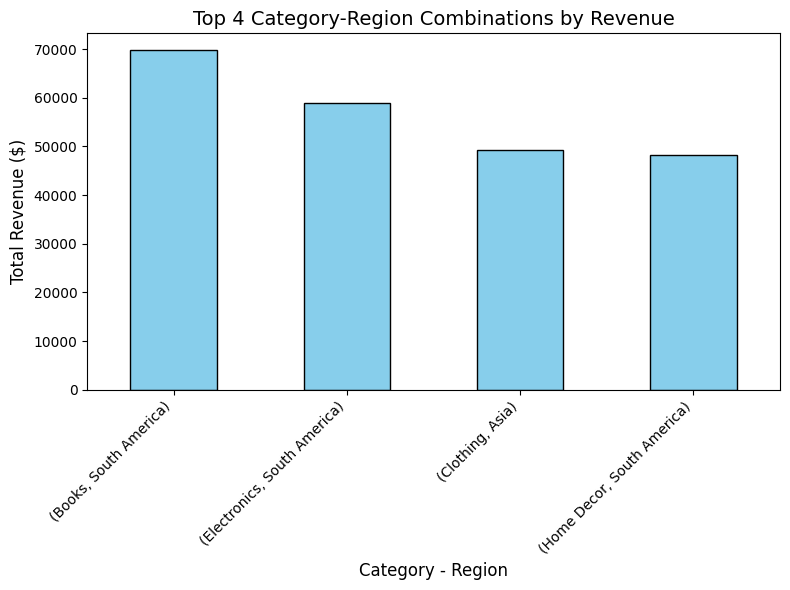

In [105]:
plt.figure(figsize=(8, 6))
top_category_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 4 Category-Region Combinations by Revenue', fontsize=14)
plt.xlabel('Category - Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. Highest Revenue Region**

In [106]:
highest_revenue_region = file_data.groupby (['Region'])['TotalValue'].sum()

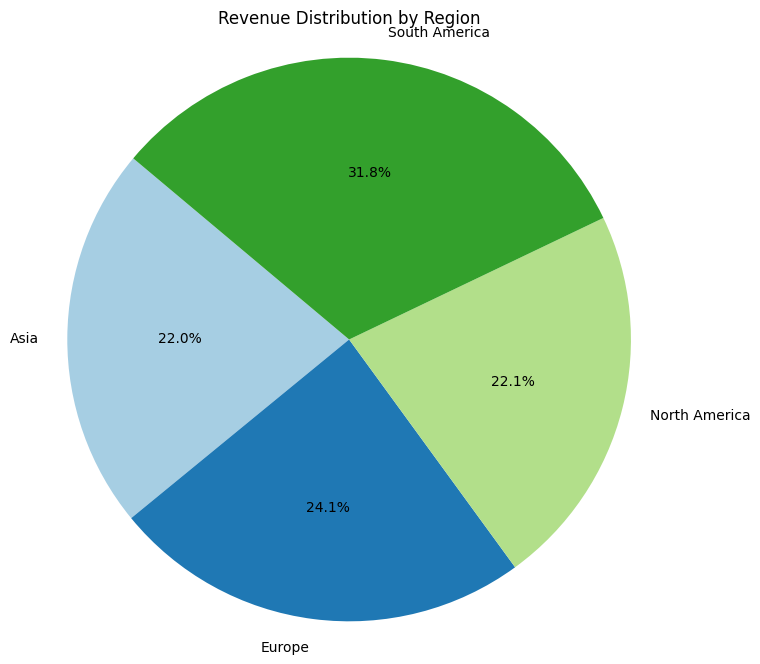

In [107]:
plt.figure(figsize=(8, 8))
plt.pie(highest_revenue_region, labels=highest_revenue_region.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.show()

**3. Top 10 popular products by quantity**

In [108]:
popular_product = file_data.groupby (['ProductName'])['Quantity'].sum().sort_values(ascending=False).head(10)

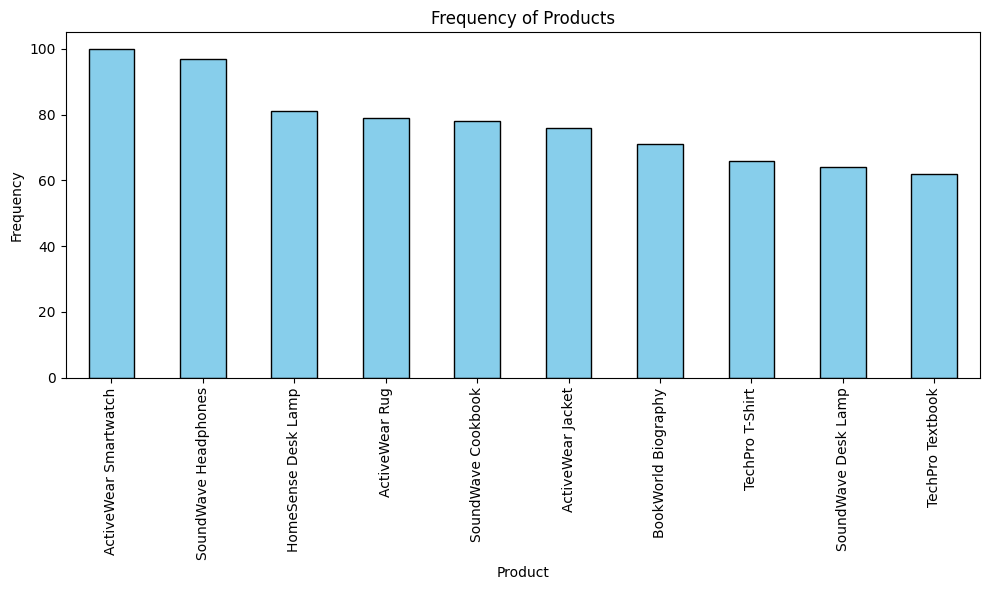

In [109]:
plt.figure(figsize=(10, 6))
popular_product.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Frequency of Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # To ensure everything fits well

plt.show()

**4. Analyzing monthly Trend**

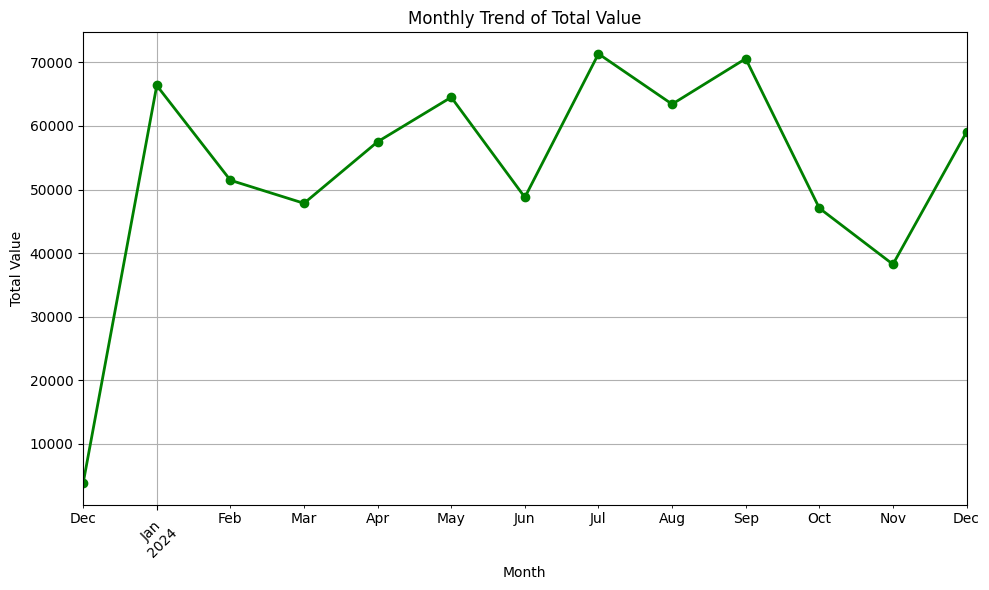

In [110]:
file_data['YearMonth'] = file_data['TransactionDate'].dt.to_period('M')

# Group by 'YearMonth' and sum the 'TotalValue'
monthly_trend = file_data.groupby('YearMonth')['TotalValue'].sum()

# Plotting the trend
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='line', color='green', marker='o', linestyle='-', linewidth=2, markersize=6)

# Adding labels and title
plt.title('Monthly Trend of Total Value')
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()
plt.show()

**5. Analyzing Customer Trend**

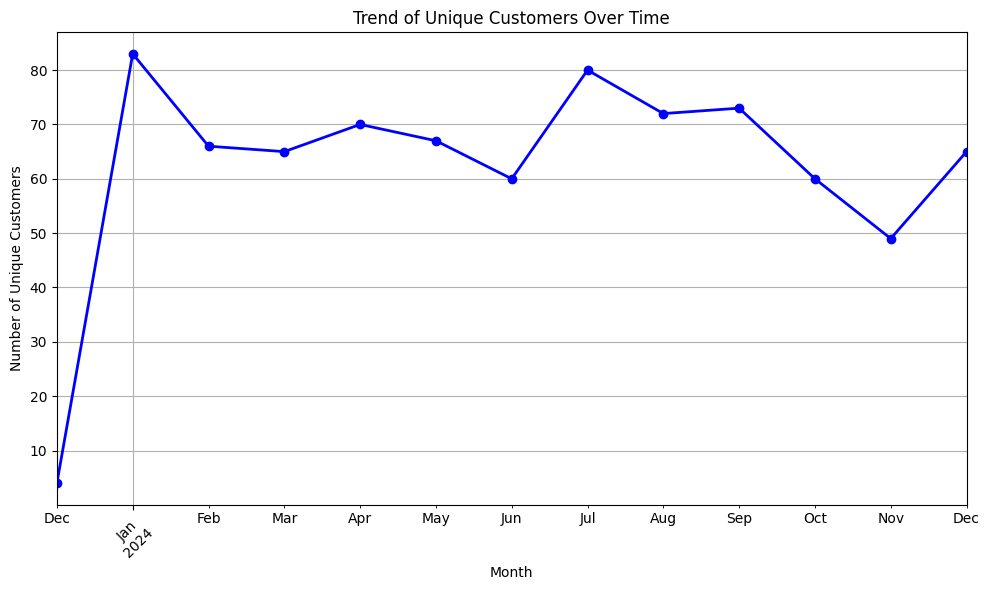

In [111]:
customer_trend = file_data.groupby('YearMonth')['CustomerID'].nunique()

# Plot the trend of unique customers
plt.figure(figsize=(10, 6))
customer_trend.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Adding labels and title
plt.title('Trend of Unique Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()
plt.show()